# Noise removal from images

This would be a generalization of multilabel classification where each label can be multiclass (i.e., it can have more than two possible values).

Here we'll build a system that removes noise from images. It will take as input a noisy digit image, and it will output a clean digit image, represented as an array of pixel intensities, just like the MNIST images.

Notice that the classifier’s output is multilabel (one label per pixel) and each label can have multiple values (pixel intensity ranges from 0 to 255). It is thus an example of a multioutput classification system.

we'll be adding noise to our MNIST dataset. We will be generating random integer using randint() and adding to original image. 

In [1]:
#Scikit-Learn provides many helper functions to download popular datasets. MNIST is one of them. The following code fetches the dataset.
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', cache=True)

In [3]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',


In [4]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [5]:
mnist.target = mnist.target.astype(np.int8)
sort_by_target(mnist)

In [6]:
X, y = mnist["data"], mnist["target"]
X.shape
y.shape

(70000,)

In [7]:
y.shape

(70000,)

In [24]:
X.shape

(70000, 784)

In [9]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

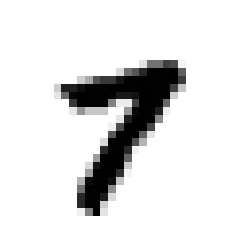

In [17]:
#To view the image of a single digit,all we need to do is grab an instance’s feature vector, reshape it to a 28×28 array, and display it using Matplotlib’s imshow() function.
some_digit = X[45001]   # Selecting the 36,000th image.
some_digit_image = some_digit.reshape(28, 28) # Reshaping it to get the 28x28 pixels
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

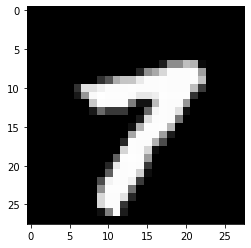

In [18]:
plt.imshow(255-some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")

In [19]:
some_digit_image.shape
X[45001].shape
y[45001]
y.shape

(70000,)

In [23]:
X[45001].shape

(784,)

In [21]:
some_digit_image.shape

(28, 28)

In [22]:
y[45001]

7

In [25]:
#We need to split the data into test and train data. The MNIST dataset is actually already split into a training set (the first 60,000 images) and a test set (the last 10,000 images)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [26]:
# we need to shuffle our training data so that it ensures that we don't miss out any digit in a cross validation fold.
np.random.seed(42)
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [27]:
#Since KNN take a lot of time, we are trimming it here
X_train = X_train[:30000]
y_train = y_train[:30000]

X_test = X_test[:5000]
y_test = y_test[:5000]


import numpy.random as rnd

noise_train = rnd.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise_train
noise_test = rnd.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise_test
y_train_mod = X_train
y_test_mod = X_test

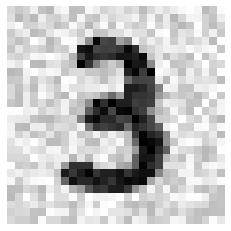

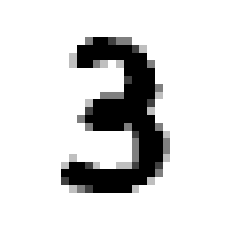

In [28]:
#Let's view the noisy image
def plot_digit(array):
    array_image = array.reshape(28, 28)
    plt.imshow(array_image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()

plot_digit(X_test_mod[4000])

plot_digit(y_test_mod[4000])

Need to clean the image using KNN classifier. It is an example of Multioutput classification. A single label is Multilabel as it has 784 classes and each of the 784 pixel can have values from 0 to 255, hence it is a Multioutput classification example.

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

In [30]:
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [31]:
clean_digit = knn_clf.predict([X_test_mod[4000]])

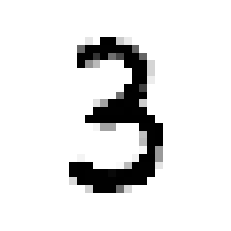

In [32]:
plot_digit(clean_digit)